<a href="https://colab.research.google.com/github/MissAnichka/Neural-Networks/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

In general, Convolutional Neural Networks are good for images.

In [2]:
# good for printing images within notebook
%matplotlib inline
import keras
import matplotlib.pyplot as pl

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import plot_model
from keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


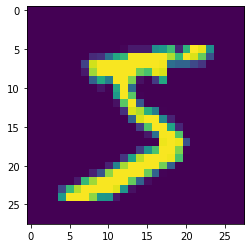

In [4]:
sample_image = X_train[0]
pl.imshow(sample_image)

In [7]:
print(sample_image[6,12])

170


In [8]:
def relu(x):
  return max(0.0, x)

In [9]:
inputs = [x for x in range(-15, 15)]
outputs = [relu(x) for x in inputs]

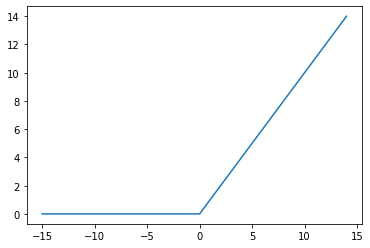

In [10]:
pl.plot(inputs, outputs)
pl.show()

In [18]:
num_classes = 10

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 10)               

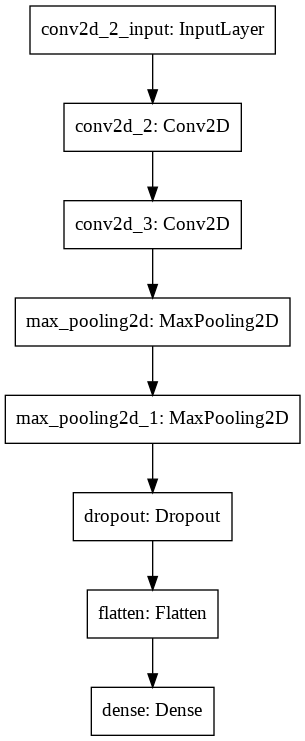

In [25]:
plot_model(model, to_file='model.png')

In [27]:
epochs=5

In [28]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [30]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.3417 - accuracy: 0.9231 - val_loss: 0.0671 - val_accuracy: 0.9780
Epoch 2/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.1036 - accuracy: 0.9689 - val_loss: 0.0725 - val_accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0871 - accuracy: 0.9735 - val_loss: 0.0518 - val_accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0742 - accuracy: 0.9773 - val_loss: 0.0567 - val_accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0688 - accuracy: 0.9789 - val_loss: 0.0525 - val_accuracy: 0.9845


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])